# Question 5

### Import dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_619/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

### Import data

In [3]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds_2016 = ds.sel(time=slice('2002-01-01', '2016-07-01'))
ds_2012 = ds.sel(time=slice('2002-01-01', '2012-12-31'))

### Calculate Anomaly

In [5]:
anomaly = ds_2016.groupby("time.dayofyear").max()['analysed_sst'] - ds_2012.groupby(ds_2012["time.dayofyear"]).mean()['analysed_sst']

### Plot Sea Surface Temperature

Text(0.5, 1.0, 'Maximum Avg. SST Anomaly (2002-July 2016, relative to 2002–2012)')

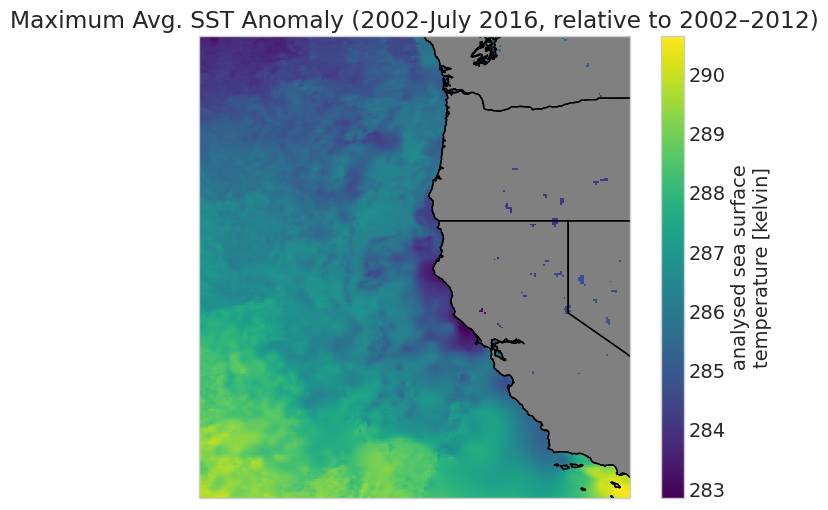

In [17]:
anomaly[0, :, :].plot();

# Plot on a map
ax = plt.subplot(projection=crs)
ds.analysed_sst[0, :, :].plot(ax=ax, transform=crs)
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))

# Add title and axis names
plt.title('Maximum Avg. SST Anomaly (2002-July 2016, relative to 2002–2012)')
# plt.xlabel('categories')
# plt.ylabel('values')
#ax.set(xlabel ="GFG X", ylabel = "GFG Y", title ='some title')
